<img src="https://raw.githubusercontent.com/HooshBaaz/2022_DataAnalytics_SummerSchool/main/assets/logo3.png" width="200" height="200" >

<div style="display:block"><br><br>
    <div style="display:block" align=left display=block> 
        <font size=5><b>Day3 - HandsOn1: Logsitic Regression & Binary Classification</b></font><br>
        <hr/>

</div>

<pre>
.
├── Dataset
│
├── Binary Classification with Logistic Regression
│
├── Different Metrics for Evaluating the Classifer
│ 
├── Plotting Decision Boundaries
│
└── (Optional) Cost-sensitive learning

 
</pre>

The sections marked with a Thinking Emoji (💭) are those which you need to read and answer. All right, without further ado, let's get started!
______________________________________

## Import Modules/Libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings(action='ignore')

_______________________________

## Dataset

Before doing anything, we need to get familiar with Dataset. The desired dataset is located in the `banking.csv` file. This dataset is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y). Below you can see the description of each feature in the dataset.

| Feature | Description |
| :- | :- |
|age | age of customer
|job  |  type of job
| marital |  marital status
| education  | status of education for each customer
| default | has credit in default?
| housing | has housing loan?
| loan | has personal loan?
| contact | contact communication type
| month | last contact month of year
| day_of_week | last contact day of the week
| duration | last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
| campaign | number of contacts performed during this campaign and for this client
| pdays | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
| previous | number of contacts performed before this campaign and for this client
| poutcome | outcome of the previous marketing campaign
| emp.var.rate | consumer price index
| cons.price.idx | number of contacts performed before this campaign and for this client
| cons.conf.idx | consumer confidence index
| euribor3m | euribor 3 month rate
| nr.employed | number of employees
| y | has the client subscribed a term deposit?





In [123]:
# read dataset as a csv file
df = pd.read_csv('banking.csv')

In [124]:
# print some rows of data 
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


### 📖 Preprocessing and Exploration
First we want you to do some preprocessing on the dataset.


#### 💭 Questions
- print unique values of the `education` column.
- Group the same education degrees with each other  and create just one. For example, group `basic.4y`, `basic.9y` and `basic.6y` together and call them `basic`.
- Plot frequency of each education degree considering target value
- Plot frequency of purchase month considering each label in target value. Which month might be a good predictor of the outcome variable?  
- Convert Categorical features to dummy variables by one hot encoding.
- Plot frequency of each target in the `y` column. Can you see anything abnormal in this distribution? may it cause any problem?




**Write the answer below:**


In [125]:
# unique education
df['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [126]:
# group education
df['education'] = df['education'].replace({'basic.4y' : 'basic' , 'basic.6y' : 'basic' , 'basic.9y' : 'basic' })



<AxesSubplot:xlabel='education'>

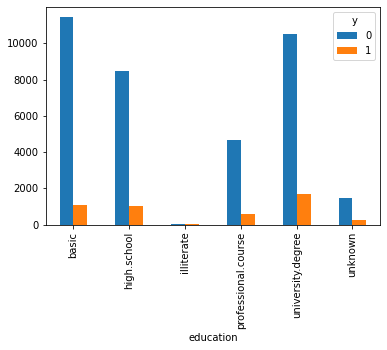

In [127]:
# plot educattion
# df['education'].value_counts().plot()
grouped_education = df.groupby(['education', 'y']).size()
grouped_education.unstack().plot(kind='bar')

<AxesSubplot:xlabel='month'>

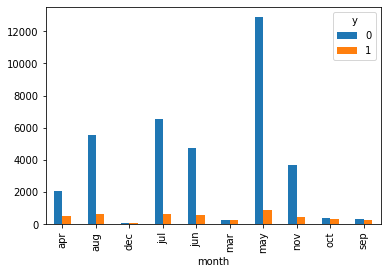

In [128]:
# plot month

grouped_month = df.groupby(['month', 'y']).size()
grouped_month.unstack().plot(kind='bar')

In [133]:
# Convert categorical
cat_cols = df.select_dtypes(include=['object']).astype('category')
df = pd.get_dummies(df)

<AxesSubplot:>

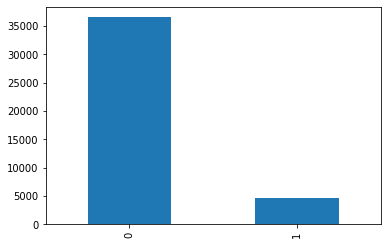

In [130]:
# plot labels frequency
df['y'].value_counts().plot(kind='bar')

__________________

## Binary Classification with Logistic Regression

### 📖 Logistic Regression
after appropriate preprocessing, in this section we are going to classify data using `logistic` regression


#### 💭 Questions
- Split data into Train/Test and consider the unbalanced data using the parameter `stratify`. Consider 20 percent of data as Test data.
- Find best parameter for `solver` using `Gridsearch`
- Train a logistic Regression model. set `penalty` to `None`. Set `solver` to the best one that you have found in the last Question.
- Predict labels for test data.




**Write the answer below:**


In [134]:
# Train/Test Split
from sklearn.model_selection import train_test_split

X = df.drop('y' , axis=1)
y = df['y']
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2 ,stratify=y)

In [135]:
# Grid search for solver
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

estimator = LogisticRegression()

grid_search = GridSearchCV(estimator, param_grid, cv=5)
grid_search.fit(X, y)

print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

c:\Users\shadm\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shadm\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\shadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\shadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\optimize.py:210: Conve

Best parameters: {'solver': 'newton-cg'}
Best score: 0.9107507226362681


c:\Users\shadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [141]:
# Train logistic
model = LogisticRegression(solver='newton-cg' , penalty='none').fit(X_train, y_train)


c:\Users\shadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\shadm\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shadm\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [159]:
# Predict labels
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print(f"Acc score {accuracy_score(y_pred , y_test):.2f}")

Acc score 0.91


_______________

## Different Metrics for Evaluating the Classifer

### 📖 Model Evaluation Using Confusion Matrix
Now we need to evaluate Our Model. Confusion Matrix is one of the tools for this purpose.


#### 💭 Questions
- Calculate and save Confusion Matrix.
- Calculate accuracy using `saved confusion matrix` and without using sklearn.
- Find the Precision and Recall for the F1-score using the saved confusion matrix.
- Which metric do you think shows the performance of the model more realistic than others? Is accuracy a good metric for this data?




**Write the answer below:**


Text(33.0, 0.5, 'True Lables')

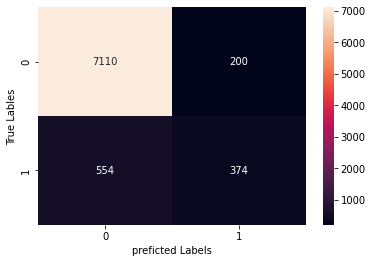

In [171]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm , annot=True ,fmt='d')
plt.xlabel("preficted Labels")
plt.ylabel("True Lables")

In [172]:
# Accuracy

((cm[0][0] + cm[1][1] ) / (cm[0][1] + cm[1][0] + cm[0][0] + cm[1][1]))  

0.9084729303228939

In [173]:
# Precision 
cm[0][0] / (cm[0][0] + cm[0][1])

0.9726402188782489

In [174]:
# Recall

cm[0][0] / (cm[0][0] + cm[1][0])

0.927713987473904

In [175]:
# F1-Score

2*cm[0][0] / (2*cm[0][0] + cm[1][0] + cm[1][0])

0.927713987473904

________________________________________________

## Decision Boundaries

Consider numeric input features for the classification task defining a continuous input feature space. We can think of each input feature defining an axis or dimension on a feature space. Two input features would define a feature space that is a plane, with dots representing input coordinates in the input space. If there were three input variables, the feature space would be a three-dimensional volume.If there were n input variables, the feature space would be a n-dimensional hyperplane. Difficult to visualize spaces beyond three dimensions. Each point in the space can be assigned a class label. In terms of a two-dimensional feature space, we can think of each point on the planing having a different color, according to their assigned class. The goal of a classification algorithm is to learn how to divide up the feature space such that labels are assigned correctly to points in the feature space, or at least, as correctly as is possible. This is a useful geometric understanding of predictive classification modeling. We can take it one step further. Once a classification machine learning algorithm divides a feature space, we can then classify each point in the feature space, on some arbitrary grid, to get an idea of how exactly the algorithm chose to divide up the feature space. This is called a `decision surface` or `decision boundary`, and it provides a diagnostic tool for understanding a model on a predictive classification modeling task.

### 📖 Dataset and Model
In order to better understand the concept of decision boundary, we decided to work with a two dimensional synthetic dataset. In this section, first we are going to generate a dataset using sklearn library and then classify the data with a logistic regression model.


#### 💭 Questions
- Generate dataset using `make_classification()` method in `sklearn` library.use the information below in order to create the dataset:
- n_samples=5000, centers=2, n_features=2, n_classes=2, n_clusters_per_class=1,weights=[0.95, 0.05]
- use `matplotlib` or `seaborn` to create a scatter plot considering the classes in different colors.
- After splitting data into Train/Test, use the `logistic regression` model to predict labels for test data and evaluate the model by calculating the accuracy.




**Write the answer below:**



In [236]:
# Generate dataset
from sklearn.datasets import make_classification

X ,y = make_classification(n_classes=2 , n_features=2 ,n_samples=5000 , n_clusters_per_class=1 , weights=[0.95 , 0.05], n_informative=2 , n_redundant=0 , n_repeated=0)

df = pd.DataFrame(X)
df[1]

0      -1.370943
1      -0.544536
2      -2.212908
3      -1.048199
4       1.447294
          ...   
4995    1.652447
4996    0.104156
4997    1.485713
4998   -1.019779
4999   -1.388699
Name: 1, Length: 5000, dtype: float64

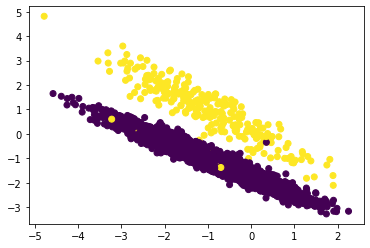

In [237]:
# Scatter plot
plt.scatter(df[0] , df[1] , c=y)

In [238]:
# logistic regression model
# fit the model
# make predictions
# evaluate the predictions
X_train2 , X_test2 , y_train2 , y_test2 = train_test_split(X,y ,test_size=0.2)
model2 = LogisticRegression().fit(X_train2,y_train2)
y_pred2 = model2.predict(X_test2)
accuracy_score(y_pred2,y_test2)

0.991

### 📖 Plotting Decision Boundary
In this section we are going to plot the decision boundary step by step.


#### 💭 Questions
- First, we need to define a grid of points across the feature space. To do this, we can find the minimum and maximum values for each feature and expand the grid one step beyond that to ensure the whole feature space is covered.
- Create a uniform sample across each dimension using the arange() function at a chosen resolution. We will use a resolution of 0.1 in this case.
- We need to turn this into a grid. We can use the `meshgrid()` NumPy function to create a grid from these two vectors.
- Flatten out the grid to create samples that we can feed into the model and make a prediction.
- Stack the vectors side by side as columns in an input dataset, e.g. like our original training dataset, but at a much higher resolution.
- Feed this data into our model and get a prediction for each point in the grid and then reshape the predictions back into a grid
- Plot the grid of values as a contour plot. The `contourf()` function takes separate grids for each axis, just like what was returned from our prior call to meshgrid(). You can also plot the actual points of the dataset over the top to see how well they were separated by the logistic regression decision surface.




**Write the answer below:**


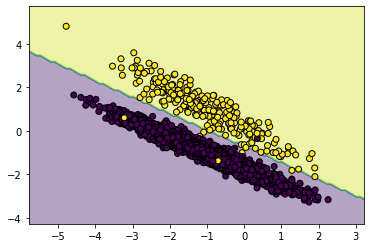

In [245]:
x_min , x_max = df[0].min() -1 , df[0].max() + 1
y_min , y_max = df[1].min() - 1 , df[1].max() + 1 
xx , yy = np.meshgrid(np.arange(x_min , x_max , 0.1 ) , np.arange(y_min , y_max , 0.1))
Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')

________________________________________

## (Optional) Cost-sensitive learning
Cost-sensitive learning is a subfield of machine learning that addresses classification problems where the misclassification costs are not equal [Elk01, FernandezGarciaG+18, LS08]. Cost-sensitive problems occur in many disciplines such as medicine (e.g., disease detection), engineering (e.g., machine failure detection), transport (e.g., traffic-jam detection), finance (e.g., fraud detection), and so forth. They are often related to the class-imbalance problem since in most of these problems, the goal is to detect events that are rare. The training datasets therefore typically contain fewer examples of the event of interest.


Python sklearn provides support for cost-sensitive learning for most baseline classifiers thanks to the class_weight parameter. The parameter allows to specify costs in three different ways:


- `None`: The misclassification costs are set to 1 (default)
- `balanced`: The costs are set according to the imbalance ratio
- `{0:c10, 1:c01}`: The misclassification costs are explicitly set for the two classes by means of a dictionary.


The use of class weights usually implies a modification in the loss function of the learning algorithm. The modification depends on the type of algorithm. By strongly penalizing mistakes on the minority class, cost-sensitive learning improves their importance during the classifier training step. This pushes the decision boundary away from these instances, allowing to improve generalization on the minority class [FernandezGarciaG+18, GTM+20].


#### 💭 Questions
- First build a logistic regression classifier with equal weights for the two classes.
- Plot the decision boundary for train and test data and the classifier
- Calculate proportion of data in classes as `IR`
- Define a new classifier by considering `IR` as misclassification count
- Plot new decision boundary for new classifier
- Is there any change in the decision boundary comparing two the classifiers?




**Write the answer below:**

In [ ]:
# Set IR =1 


In [ ]:
# Train classifier


In [ ]:
# plot decision boundary

In [ ]:
# Set IR and class_weight
IR=0.05/0.95
class_weight={0:IR,1:1}

In [ ]:
# Train classifier with new IR and class_weight


In [ ]:
# plot decision boundary
